## Web Scrapping Using Selenium

### 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [676]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException

In [677]:
PATH= "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

In [678]:
driver.get('https://www.amazon.in/')

In [679]:
driver.find_element_by_id("twotabsearchtextbox").send_keys('iphone')

In [680]:
driver.find_element_by_id("nav-search-submit-button").click()

In [681]:
brand_name = []
phone_name = []
Exchange = []
Replacement = []
Available = []
Delivery = []
URL = []

for a in range(0,3): 
    phone_links = driver.find_elements_by_xpath('//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-2"]/a')
    for i in phone_links:
        i.click()
        time.sleep(2)
    for i in range(1,len(phone_links)+1):
        time.sleep(2)
        driver.switch_to.window(driver.window_handles[i])
        brand_names = driver.find_element_by_xpath('//h1[@class="a-size-large a-spacing-none"]').text.split(' ')[0]
        try:
            phone_names = driver.find_element_by_xpath('//h1[@class="a-size-large a-spacing-none"]').text.split('Apple')[1]
        except:
            phone_names = driver.find_element_by_xpath('//h1[@class="a-size-large a-spacing-none"]').text
        try:
            exchange = driver.find_element_by_xpath("//div[@class='a-section a-spacing-none sopp-offer-container']").text
        except NoSuchElementException:
            exchange = '-'
        try:
            replacement = driver.find_element_by_id("productSupportAndReturnPolicy-return-policy-anchor-text").text
        except NoSuchElementException:
            replacement = driver.find_element_by_xpath('//a[@class="a-size-small a-link-normal a-text-normal"]').text
        try:
            delivery = driver.find_element_by_id('mir-layout-DELIVERY_BLOCK-slot-DELIVERY_MESSAGE').text.strip(' ').split(':')[1].strip('Details').strip()
        except NoSuchElementException:
            delivery = '-'
        try:
            available = driver.find_element_by_xpath('//div[@class="a-section a-spacing-small a-text-center"]/span').text
        except NoSuchElementException:
            available = 'Available'
            
        url = driver.current_url
        phone_name.append(phone_names)
        brand_name.append(brand_names)
        Exchange.append(exchange)
        Replacement.append(replacement)
        Available.append(available)
        Delivery.append(delivery)
        URL.append(url)
    for i in range(1,len(phone_links)+1):
        driver.switch_to.window(driver.window_handles[1])
        driver.close()
        
        
    driver.switch_to.window(driver.window_handles[0])
    time.sleep(2)
    try:
        driver.find_element_by_xpath('//a[@class="s-pagination-item s-pagination-button"]').click()
    except ElementClickInterceptedException:
        driver.find_element_by_xpath('//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]').click()
    time.sleep(5)

In [682]:
Amazon = pd.DataFrame({})
Amazon['Brand'] = brand_name
Amazon['Phone name'] = phone_name
Amazon['Exchange'] = Exchange
Amazon['Replacement'] = Replacement
Amazon['Availability'] = Available
Amazon['Delivery'] = Delivery
Amazon['URL'] = URL

Amazon

,Brand,Phone name,Exchange,Replacement,Availability,Delivery,URL
0,Apple,iPhone 13 Pro (128 GB) - Alpine Green,Bank Offer (2): Flat INR 3000 In…See All,7-day replacement only,Available,"Saturday, May 28",https://www.amazon.in/Apple-iPhone-13-Pro-128/...
1,Apple,iPhone 13 (128GB) - (Product) RED,"Exchange Offer: Up to ₹11,450.00 off on Exchange",7-day replacement only,Available,"Thursday, May 26",https://www.amazon.in/Apple-iPhone-13-128GB-Pr...
2,Apple,iPhone 13 (128GB) - Starlight,"Exchange Offer: Up to ₹11,450.00 off on Exchange",7-day replacement only,Available,"Thursday, May 26",https://www.amazon.in/Apple-iPhone-13-128GB-St...
3,Apple,iPhone 12 (64GB) - Blue,"Exchange Offer: Up to ₹11,050.00 off on Exchange",7-day replacement only,Available,"Saturday, May 28",https://www.amazon.in/New-Apple-iPhone-12-64GB...
4,Apple,iPhone 13 Pro Max (256GB) - Sierra Blue,Bank Offer (2): Flat INR 3000 In…See All,7-day replacement only,Available,"Thursday, May 26",https://www.amazon.in/Apple-iPhone-Pro-Max-256...
5,Apple,iPhone 13 (128GB) - Pink,"Exchange Offer: Up to ₹11,450.00 off on Exchange",7-day replacement only,Available,"Thursday, May 26",https://www.amazon.in/Apple-iPhone-13-128GB-Pi...
6,Apple,iPhone 13 (256GB) - Blue,"Exchange Offer: Up to ₹11,050.00 off on Exchange",7-day replacement only,Available,"Thursday, May 26",https://www.amazon.in/Apple-iPhone-13-256GB-Bl...
7,Apple,iPhone 13 (128GB) - Blue,"Exchange Offer: Up to ₹11,450.00 off on Exchange",7-day replacement only,Available,"Thursday, May 26",https://www.amazon.in/Apple-iPhone-13-128GB-Bl...
8,Apple,iPhone XR (128GB) - (Product) RED,"Exchange Offer: Up to ₹11,050.00 off on Exchange",7-day replacement only,Available,May 25 - June 16,https://www.amazon.in/New-Apple-iPhone-XR-128G...
9,6G,6G Space Grey Compatible with iPhone with 8 Me...,Bank Offer (4): 10% Instant Discount…See All,7 Days Replacement,Available,"Saturday, May 28",https://www.amazon.in/6G-Compatible-iPhone-Cam...


### 3. Write a python program to access the search bar and search button on images.google.com and scrape 10images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [669]:
import selenium
from selenium import  webdriver
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [670]:
def Google_images(Item_to_Search):
    PATH = 'C:\Program Files (x86)\chromedriver.exe'
    driver = webdriver.Chrome(PATH)
    driver.get('https://images.google.com/')
    driver.find_element_by_xpath('//*[@id="sbtc"]/div/div[2]/input').send_keys(Item_to_Search)
    driver.find_element_by_xpath('//*[@id="sbtc"]/div/div[2]/input').send_keys(Keys.ENTER)
    for i in range(1, 11):
        Path = driver.find_element_by_xpath('//*[@id="islrg"]/div[1]/div[' +str(i) + ']/a[1]/div[1]/img')
        time.sleep(2)
        Path.screenshot(Item_to_Search + ' (' + str(i) + ').png')
    driver.close()

In [ ]:
Google_images('Fruits')

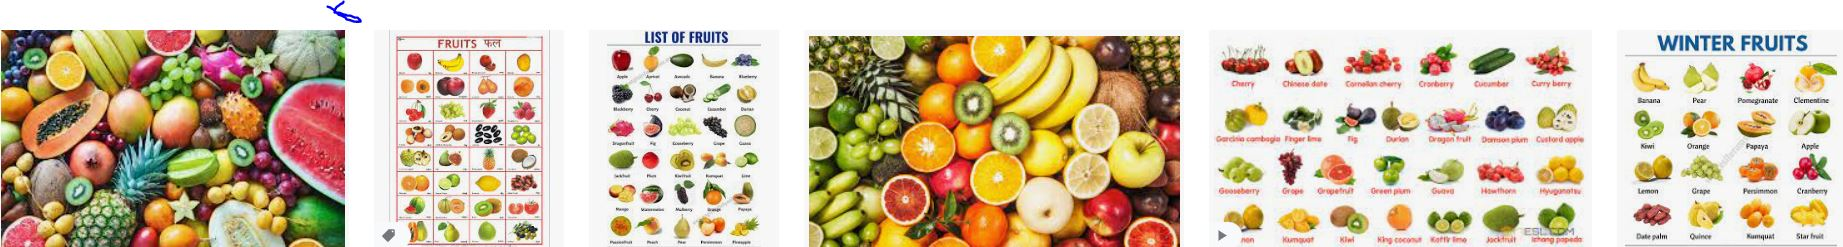

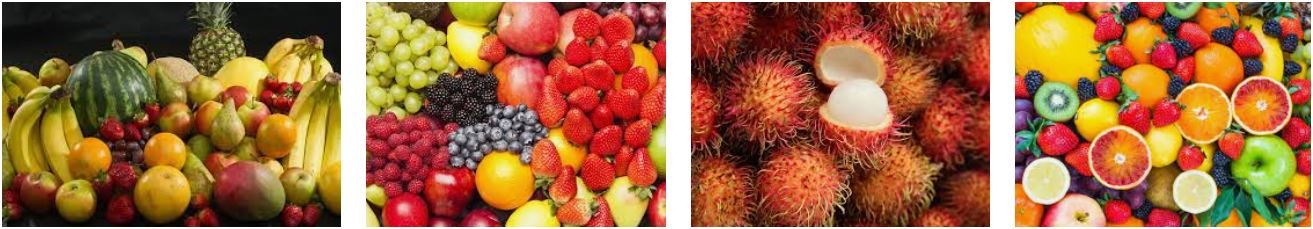

In [ ]:
Google_images('cars and machine learning')

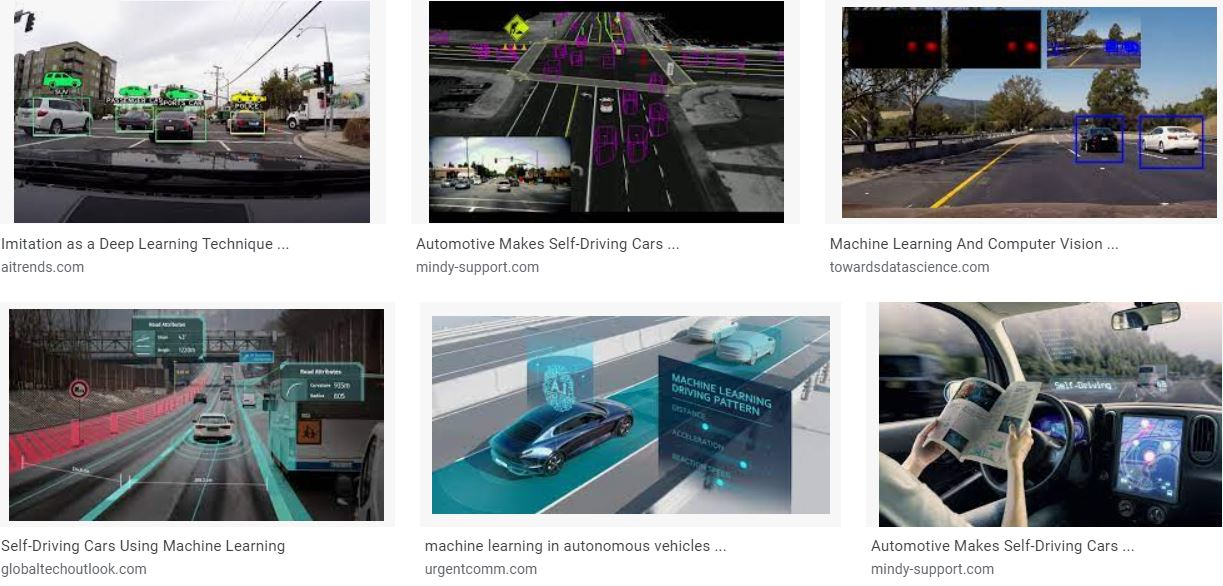

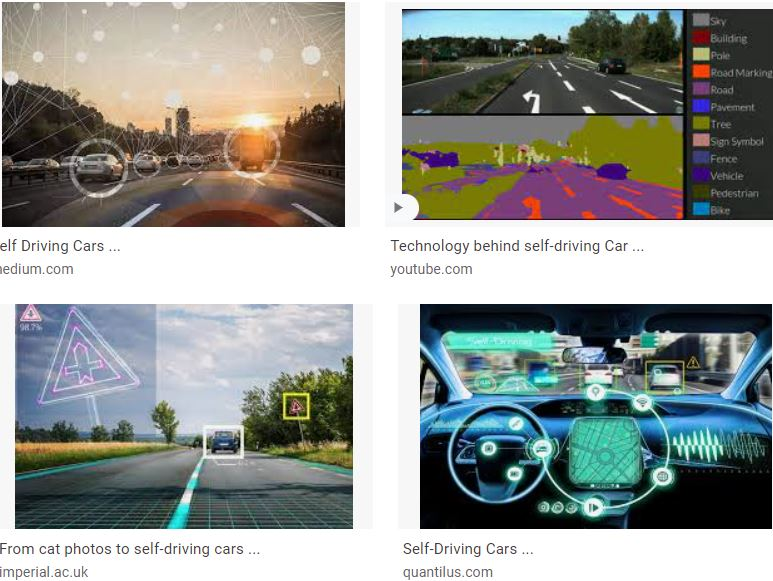

In [ ]:
Google_images('Guitar')

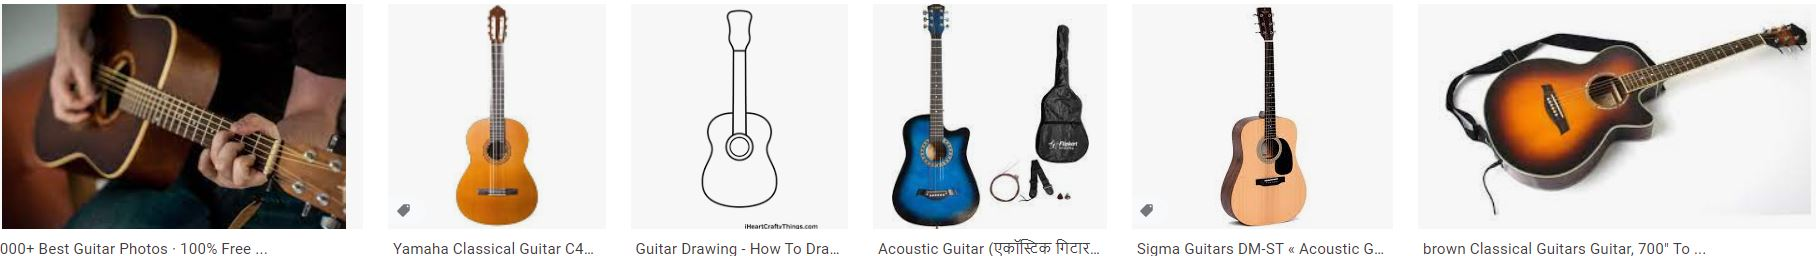

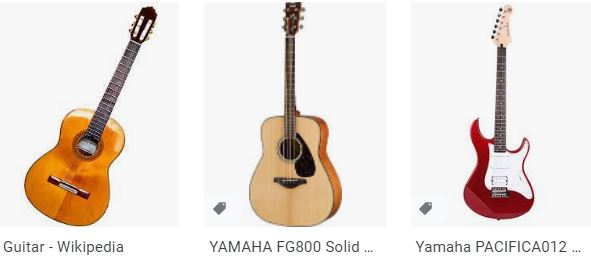

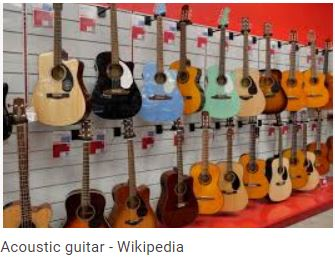

### 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.


In [490]:
import selenium
from selenium import  webdriver
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [491]:
PATH= "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

driver.get('https://www.flipkart.com/')

In [492]:
driver.find_element_by_class_name("_3704LK").send_keys('Smasung Galaxy Note 7')

In [530]:
Brand = []

brand_name = driver.find_elements_by_xpath('//div[@class="col col-7-12"]/div[1]')
for i in brand_name:
    b = i.text
    Brand.append(b.split(' ')[0])
len(Brand),Brand

(24,
 ['SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG',
  'SAMSUNG'])

In [531]:
Name = []

smart_name = driver.find_elements_by_xpath('//div[@class="col col-7-12"]/div[1]')
for i in brand_name:
    s = i.text
    Name.append(s.split(' ')[1:4])
len(Name),Name

(24,
 [['Galaxy', 'Note', '20'],
  ['Galaxy', 'Note', '20'],
  ['Galaxy', 'Note', '20'],
  ['Galaxy', 'Note', '20'],
  ['Galaxy', 'Note', '10'],
  ['Galaxy', 'Note', '3'],
  ['Galaxy', 'Note', '5'],
  ['Galaxy', 'Note', '5'],
  ['Galaxy', 'Note', '4'],
  ['Galaxy', 'Note', '5'],
  ['Galaxy', 'Note', '5'],
  ['Galaxy', 'Note', '4'],
  ['Galaxy', 'Note', '5'],
  ['Galaxy', 'Note', '5'],
  ['Galaxy', 'Note', '4'],
  ['Galaxy', 'Note', '5'],
  ['Galaxy', 'Note', '4'],
  ['Galaxy', 'Note', '5'],
  ['Galaxy', 'Note', '3'],
  ['Galaxy', 'Note', '3'],
  ['Galaxy', 'Note', '3'],
  ['Galaxy', 'Note', 'Edge'],
  ['Galaxy', 'Note10', 'Lite'],
  ['Galaxy', 'Note', '8']])

In [569]:
Color = []

color = driver.find_elements_by_xpath('//div[@class="_4rR01T"]')
for i in color:
    c = i.text
    Color.append(c.split(' ')[4:6])
len(Color),Color

(24,
 [['(Mystic', 'Bronze,'],
  ['Ultra', '5G'],
  ['Ultra', '5G'],
  ['(Mystic', 'Green,'],
  ['Plus', '(Aura'],
  ['(Classic', 'White,'],
  ['(Black', 'Sapphire,'],
  ['(Gold', 'Platinum,'],
  ['(Blossom', 'Pink,'],
  ['(Dual', 'Sim)'],
  ['(Dual', 'Sim)'],
  ['(Charcoal', 'Black,'],
  ['(Dual', 'Sim)'],
  ['(black', 'sapphire,'],
  ['(Frost', 'White,'],
  ['(Silver', 'Titanium,'],
  ['(Bronze', 'Gold,'],
  ['(Silver', 'Titanium,'],
  ['(Jet', 'Black,'],
  ['Neo', '(Black,'],
  ['Neo', '(White,'],
  ['(Frost', 'White,'],
  ['(Aura', 'Glow,'],
  ['(Orchid', 'Grey,']])

In [532]:
Ram = []

ram = driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]/li[1]')
for i in ram:
    r = i.text
    Ram.append(r.split(' ')[0:2])
len(Ram),Ram

(24,
 [['8', 'GB'],
  ['12', 'GB'],
  ['12', 'GB'],
  ['8', 'GB'],
  ['12', 'GB'],
  ['3', 'GB'],
  ['4', 'GB'],
  ['4', 'GB'],
  ['3', 'GB'],
  ['4', 'GB'],
  ['4', 'GB'],
  ['3', 'GB'],
  ['4', 'GB'],
  ['4', 'GB'],
  ['3', 'GB'],
  ['4', 'GB'],
  ['3', 'GB'],
  ['4', 'GB'],
  ['3', 'GB'],
  ['2', 'GB'],
  ['2', 'GB'],
  ['3', 'GB'],
  ['8', 'GB'],
  ['6', 'GB']])

In [538]:
Rom = []

rom = driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]/li[1]')
for i in rom:
    ro = i.text
    Rom.append(ro.split(' ')[4:6])
len(Rom),Rom

(24,
 [['256', 'GB'],
  ['256', 'GB'],
  ['256', 'GB'],
  ['256', 'GB'],
  ['256', 'GB'],
  ['32', 'GB'],
  ['32', 'GB'],
  ['32', 'GB'],
  ['32', 'GB'],
  ['32', 'GB'],
  ['32', 'GB'],
  ['32', 'GB'],
  ['32', 'GB'],
  ['32', 'GB'],
  ['32', 'GB'],
  ['64', 'GB'],
  ['32', 'GB'],
  ['32', 'GB'],
  ['32', 'GB'],
  ['16', 'GB'],
  ['16', 'GB'],
  ['32', 'GB'],
  ['128', 'GB'],
  ['64', 'GB']])

In [543]:
Dis = []

display = driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]/li[2]')
for i in display:
    d = i.text
    Dis.append(d.split(' ')[0:2])
len(Dis),Dis

(24,
 [['17.02', 'cm'],
  ['17.53', 'cm'],
  ['17.53', 'cm'],
  ['17.02', 'cm'],
  ['17.27', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['14.48', 'cm'],
  ['13.97', 'cm'],
  ['13.97', 'cm'],
  ['14.22', 'cm'],
  ['17.02', 'cm'],
  ['16.0', 'cm']])

In [547]:
Battery = []

b_capacity = driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]/li[4]')
for i in b_capacity:
    bat = i.text
    Battery.append(bat.split(' ')[0:2])
len(Battery),Battery

(24,
 [['4300', 'mAh'],
  ['4500', 'mAh'],
  ['4500', 'mAh'],
  ['4300', 'mAh'],
  ['4300', 'mAh'],
  ['3200', 'mAh'],
  ['3000', 'mAh'],
  ['3000', 'mAh'],
  ['3220', 'mAh'],
  ['3000', 'mAh'],
  ['3000', 'mAh'],
  ['3220', 'mAh'],
  ['3000', 'mAh'],
  ['3000', 'mAh'],
  ['3220', 'mAh'],
  ['3000', 'mAh'],
  ['3220', 'mAh'],
  ['3000', 'mAh'],
  ['3200', 'mAh'],
  ['3100', 'mAh'],
  ['3100', 'mAh'],
  ['3000', 'mAh'],
  ['4500', 'mAh'],
  ['3300', 'mAh']])

In [565]:
Back = []

primary = driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]/li[3]')
for i in primary:
    cam = i.text
    Back.append(cam.split(' ')[0])
len(Back),Back

(24,
 ['64MP',
  '108MP',
  '108MP',
  '64MP',
  '12MP',
  '13MP',
  '16MP',
  '16MP',
  '16MP',
  '16MP',
  '16MP',
  '16MP',
  '16MP',
  '16MP',
  '16MP',
  '16MP',
  '16MP',
  '16MP',
  '13MP',
  '8MP',
  '8MP',
  '16MP',
  '12MP',
  '12MP'])

In [557]:
Capacity = []

cap = driver.find_elements_by_xpath('//ul[@class="_1xgFaf"]/li[4]')
for i in cap:
    ca = i.text
    Capacity.append(ca[0:8])
len(Capacity),Capacity

(24,
 ['4300 mAh',
  '4500 mAh',
  '4500 mAh',
  '4300 mAh',
  '4300 mAh',
  '3200 mAh',
  '3000 mAh',
  '3000 mAh',
  '3220 mAh',
  '3000 mAh',
  '3000 mAh',
  '3220 mAh',
  '3000 mAh',
  '3000 mAh',
  '3220 mAh',
  '3000 mAh',
  '3220 mAh',
  '3000 mAh',
  '3200 mAh',
  '3100 mAh',
  '3100 mAh',
  '3000 mAh',
  '4500 mAh',
  '3300 mAh'])

In [566]:
Price = []

price = driver.find_elements_by_xpath('//div[@class="_30jeq3 _1_WHN1"]')
for i in price:
    p = i.text
    Price.append(p.strip('₹'))
len(Price),Price

(24,
 ['77,999',
  '1,04,999',
  '1,04,999',
  '77,999',
  '59,599',
  '43,092',
  '57,000',
  '57,000',
  '61,500',
  '46,300',
  '46,300',
  '36,900',
  '46,300',
  '46,900',
  '36,900',
  '49,990',
  '61,500',
  '29,990',
  '21,999',
  '25,812',
  '13,000',
  '30,000',
  '39,749',
  '74,000'])

In [572]:
SMARTPHONE = pd.DataFrame({})
SMARTPHONE['Brand Name'] = Brand
SMARTPHONE['Smartphone Name'] = Name
SMARTPHONE['RAM'] = Ram
SMARTPHONE['ROM'] = Rom
SMARTPHONE['Primary Camera'] = Back 
SMARTPHONE['Display Size'] = Dis
SMARTPHONE['Battery Capacity'] = Capacity 
SMARTPHONE['Price'] = Price

SMARTPHONE

,Brand Name,Smartphone Name,RAM,ROM,Primary Camera,Display Size,Battery Capacity,Price
0,SAMSUNG,"[Galaxy, Note, 20]","[8, GB]","[256, GB]",64MP,"[17.02, cm]",4300 mAh,"77,999"
1,SAMSUNG,"[Galaxy, Note, 20]","[12, GB]","[256, GB]",108MP,"[17.53, cm]",4500 mAh,"1,04,999"
2,SAMSUNG,"[Galaxy, Note, 20]","[12, GB]","[256, GB]",108MP,"[17.53, cm]",4500 mAh,"1,04,999"
3,SAMSUNG,"[Galaxy, Note, 20]","[8, GB]","[256, GB]",64MP,"[17.02, cm]",4300 mAh,"77,999"
4,SAMSUNG,"[Galaxy, Note, 10]","[12, GB]","[256, GB]",12MP,"[17.27, cm]",4300 mAh,"59,599"
5,SAMSUNG,"[Galaxy, Note, 3]","[3, GB]","[32, GB]",13MP,"[14.48, cm]",3200 mAh,"43,092"
6,SAMSUNG,"[Galaxy, Note, 5]","[4, GB]","[32, GB]",16MP,"[14.48, cm]",3000 mAh,"57,000"
7,SAMSUNG,"[Galaxy, Note, 5]","[4, GB]","[32, GB]",16MP,"[14.48, cm]",3000 mAh,"57,000"
8,SAMSUNG,"[Galaxy, Note, 4]","[3, GB]","[32, GB]",16MP,"[14.48, cm]",3220 mAh,"61,500"
9,SAMSUNG,"[Galaxy, Note, 5]","[4, GB]","[32, GB]",16MP,"[14.48, cm]",3000 mAh,"46,300"


### 6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) 
### from trak.in.

In [1]:
import selenium
from selenium import  webdriver
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH= "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

In [3]:
driver.get('https://trak.in/')

In [20]:
dt = []

date = driver.find_elements_by_xpath("//td[@class='column-2']")
date

for i in date:
    d = i.text
    dt.append(d.split(' '))
    
dt[5:29]

[['04/03/2021'],
 ['31/03/2021'],
 ['30/03/2021'],
 ['30/03/2021'],
 ['23/03/2021'],
 ['25/03/2021'],
 ['26/03/2021'],
 ['11/02/2021'],
 ['22/02/2021'],
 ['19/02/2021'],
 ['17/02/2021'],
 ['15/02/2021'],
 ['12/02/2021'],
 ['12/02/2021'],
 ['09/02/2021'],
 ['09/02/2021'],
 ['15/01/2021'],
 ['28/01/2021'],
 ['19/01/2021'],
 ['19/01/2021'],
 ['18/01/2021'],
 ['18/01/2021'],
 ['11/01/2021'],
 ['13/01/2021']]

In [21]:
sup = []

stup = driver.find_elements_by_xpath("//td[@class='column-3']/a[1]")
stup

for i in stup:
    s = i.text
    sup.append(s)
sup[5:29]

['DealShare',
 'Uniphore',
 'Dunzo',
 'BYJU’S',
 'SkilloVilla',
 'CityMall',
 'DotPe',
 'Doubtnut',
 'Zomato',
 'Fingerlix',
 'Zolve',
 'KreditBee',
 'Pepperfry',
 'Grofers',
 'Nothing',
 'SplashLearn',
 'Digit Insurance',
 'Bombay Shaving Company',
 'DeHaat',
 'Darwinbox',
 'mfine',
 'Udayy',
 'True Elements',
 'Saveo']

In [22]:
n = []

ind = driver.find_elements_by_xpath("//td[@class='column-4']")
ind

for i in ind:
    d = i.text
    n.append(d)
n[5:29]

['E-commerce',
 'Technology',
 'E-commerce',
 'Edu-tech',
 'Edu-tech',
 'E-commerce',
 'FinTech',
 'Edu Tech',
 'Hospitality',
 'Hospitality',
 'FinTech',
 'Finance',
 'E-commerce',
 'E-Commerce',
 'Technology',
 'EdTech',
 'Financial Services',
 'Consumer Goods Company',
 'AgriTech Startup',
 'SaaS',
 'Health Tech Startup',
 'EdTech',
 'Food Startup',
 'B2B E-commerce']

In [23]:
v = []

a = driver.find_elements_by_xpath("//td[@class='column-5']")
a

for i in a:
    s = i.text
    v.append(s)
    
v[5:29]

['Online shopping platform',
 'Conversational Service Automation (CSA)',
 'Hyper-local delivery app',
 'Online tutoring',
 'Career and job-oriented upskilling.',
 'Social ecommerce and online grocery platform',
 'Commerce and payments platform to offline enterprise businesses.',
 'E-Learning Platform',
 'Online Food Delivery Platform',
 'Semi-cooked food delivery app',
 'Global Neobank Venture',
 'Digital lending platform',
 'Multi-brand furniture brand',
 'Online supermarket',
 'Consumer Technology Venture',
 'Game-based learning programme',
 'Insurance Services',
 'Shave care, beard care, and skincare products',
 'online marketplace for farm products and services',
 'HR Tech',
 'AI-powered telemedicine mobile app',
 'Online learning platform for kids in class 1-5',
 'Whole Food plant based Nashta',
 'Pharmacies']

In [26]:
l = []

city = driver.find_elements_by_xpath("//td[@class='column-6']")
city

for i in city:
    loc = i.text
    l.append(loc)
l[5:29]

['Jaipur, Rajasthan',
 'Palo Alto',
 'Bengaluru',
 'Bengaluru',
 'Bengaluru',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Gurgaon',
 'Mumbai',
 'Mumbai',
 'Bengaluru',
 'Mumbai',
 'Gurgaon',
 'London',
 'Gurgaon',
 'Bengaluru',
 'New Delhi',
 'Patna',
 'Mumbai',
 'Bengaluru',
 'Gurgaon',
 'Pune',
 'Bengaluru']

In [29]:
n = []

name = driver.find_elements_by_xpath("//td[@class='column-7']")
name

for i in name:
    m = i.text
    n.append(m)
n[5:29]

['Innoven Capital',
 'Sorenson Capital Partners',
 'Krishtal Advisors Pte Ltd',
 'MC Global Edtech, B Capital, Baron, others',
 'Titan Capital, others',
 'Accel Partners',
 'PayU',
 'SIG Global, Sequoia Capital, WaterBridge Ventures and ON Mauritius',
 'Tiger Global, Kora',
 'Rhodium Trust, Accel Partners and Swiggy',
 'Accel Partners and Lightspeed Venture Partners',
 'Azim Premji’s PremjiInvest and South Korea’s Mirae Asset Venture',
 'InnoVen Capital',
 'SoftBank Vision Fund (SVF)',
 'GV',
 'Owl Ventures',
 'A91 Partners, Faering Capital, TVS Capital Funds',
 'Reckitt Benckiser',
 'Prosus Ventures',
 'Salesforce Ventures',
 'Heritas Capital Management',
 'Sequoia Capital',
 'SIDBI Venture Capital',
 'Matrix Partners India, RTP Global, others']

In [31]:
t= []

invest = driver.find_elements_by_xpath("//td[@class='column-8']")
invest

for i in invest:
    it = i.text
    t.append(it)
t[5:29]

['Debt Financing',
 'Series D',
 'Series E',
 'Series F',
 'Seed',
 'Series A',
 'Series A',
 'Series B',
 'Venture',
 'Series C',
 'Seed',
 'Series C',
 'Debt Financing',
 'Unspecified',
 'Series A',
 'Series C',
 'Venture',
 'Venture',
 'Series C',
 'Seed',
 'Venture Round',
 'Seed Funding',
 'Series',
 'Seed']

In [33]:
a = []

amt = driver.find_elements_by_xpath("//td[@class='column-9']/strong[1]")
amt

for i in amt:
    u = i.text
    a.append(u)
a[5:29]

['250,000,000',
 '140,000,000',
 '8,000,000',
 '460,000,000',
 '300,000,000',
 '11,000,000',
 '27,500,000',
 '2,500,000',
 '250,000,000',
 '2,747,045.20',
 '1,50,00,000',
 '75,000,000',
 '4,773,958',
 '55,000,000',
 '15,000,000',
 '18,000,000',
 '1,80,00,000',
 '6,172,258.50',
 '30,000,000',
 '15,000,000',
 '16,000,000',
 '15,000,000',
 '100,000,000',
 '4,000,000']

In [34]:
Trak = pd.DataFrame({})
Trak['Date'] = dt[5:29]
Trak['Startup Name'] = sup[5:29]
Trak['Industry'] = n[5:29]
Trak['Sub Vertical'] = v[5:29]
Trak['City/Location'] = l[5:29]
Trak['Investors Name'] = n[5:29]
Trak['Investment Type'] = t[5:29]
Trak['Amount(in USD)'] = a[5:29]

Trak

,Date,Startup Name,Industry,Sub Vertical,City/Location,Investors Name,Investment Type,Amount(in USD)
0,[04/03/2021],DealShare,Innoven Capital,Online shopping platform,"Jaipur, Rajasthan",Innoven Capital,Debt Financing,"250,000,000"
1,[31/03/2021],Uniphore,Sorenson Capital Partners,Conversational Service Automation (CSA),Palo Alto,Sorenson Capital Partners,Series D,"140,000,000"
2,[30/03/2021],Dunzo,Krishtal Advisors Pte Ltd,Hyper-local delivery app,Bengaluru,Krishtal Advisors Pte Ltd,Series E,"8,000,000"
3,[30/03/2021],BYJU’S,"MC Global Edtech, B Capital, Baron, others",Online tutoring,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series F,"460,000,000"
4,[23/03/2021],SkilloVilla,"Titan Capital, others",Career and job-oriented upskilling.,Bengaluru,"Titan Capital, others",Seed,"300,000,000"
5,[25/03/2021],CityMall,Accel Partners,Social ecommerce and online grocery platform,Gurgaon,Accel Partners,Series A,"11,000,000"
6,[26/03/2021],DotPe,PayU,Commerce and payments platform to offline ente...,Gurgaon,PayU,Series A,"27,500,000"
7,[11/02/2021],Doubtnut,"SIG Global, Sequoia Capital, WaterBridge Ventu...",E-Learning Platform,Gurgaon,"SIG Global, Sequoia Capital, WaterBridge Ventu...",Series B,"2,500,000"
8,[22/02/2021],Zomato,"Tiger Global, Kora",Online Food Delivery Platform,Gurgaon,"Tiger Global, Kora",Venture,"250,000,000"
9,[19/02/2021],Fingerlix,"Rhodium Trust, Accel Partners and Swiggy",Semi-cooked food delivery app,Mumbai,"Rhodium Trust, Accel Partners and Swiggy",Series C,"2,747,045.20"


### 7. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [453]:
import selenium
from selenium import  webdriver
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [598]:
PATH= "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

driver.get('https://www.digit.in/')

In [599]:
driver.find_element_by_xpath('/html/body/div[1]/div/div[4]/ul/li[3]/a').click()

In [600]:
driver.find_element_by_xpath('/html/body/div[6]/div/div[2]/div[2]/ul/li[10]/a').click()

In [602]:
X = driver.find_elements_by_xpath('//div[@class="right-container"]/div/a')
Names = []
for i in X:
    names = i.text
    Names.append(names)

In [604]:
OS = []
DISPLAY = []
PROCESSOR = []
MEMORY = []

A = driver.find_elements_by_xpath('//div[@class="product-detail"]')
for i in A:
    os = i.text.split('\n')[1]
    OS.append(os)
    
    display = i.text.split('\n')[3]
    DISPLAY.append(display)
    
    pro = i.text.split('\n')[5]
    PROCESSOR.append(pro)
    
    mem = i.text.split('\n')[7]
    MEMORY.append(mem)

In [606]:
Weight = []

W = driver.find_elements_by_xpath('//div[@class="Spcs-details"]/table/tbody/tr[7]')
for i in W:
    weight = i.text.strip('Weight : ')
    Weight.append(weight)

In [608]:
Dimensions = []

D = driver.find_elements_by_xpath('//div[@class="Spcs-details"]/table/tbody/tr[8]')
for i in D:
    dim = i.text.strip('Dimension : ')
    Dimensions.append(dim)

In [610]:
Graphic_Proc = []

G = driver.find_elements_by_xpath('//div[@class="Spcs-details"]/table/tbody/tr[9]')
for i in G:
    graphic = i.text.strip('Dimension : ')
    Graphic_Proc.append(graphic)

In [618]:
price = []

P = driver.find_elements_by_xpath('//div[@class="Top10-Seller"]/table/tbody/tr')
for i in P:
    pr = i.text.split('₹ ')[1]
    price.append(pr)
price

['429,940',
 '285,390',
 '129,990',
 '134,990',
 '193,990',
 '215,990',
 '144,990',
 '139,990',
 '185,000',
 '53,490']

In [619]:
DIGIT = pd.DataFrame({})
DIGIT['NAME'] = Names
DIGIT['OS'] = OS 
DIGIT['DISPLAY'] = DISPLAY
DIGIT['PROCESSOR'] = PROCESSOR
DIGIT['MEMORY'] = MEMORY
DIGIT['WEIGHT'] = Weight
DIGIT['DIMENSIONS'] = Dimensions
DIGIT['GRAPHIC PROCESSOR'] = Graphic_Proc
DIGIT['PRICE'] = price

DIGIT

,NAME,OS,DISPLAY,PROCESSOR,MEMORY,WEIGHT,DIMENSIONS,GRAPHIC PROCESSOR,PRICE
0,MSI RAIDER GE76,WINDOWS 11 HOME,"17"" (3840 X 2160)",12TH GEN INTEL CORE I9-12900HK | 5 GHZ,2 TB SSD/16 GBGB DDR5,2.9,397 x 284 x 26,Graphics Processor : NVIDIA GeForce RTX 3080T,"429,940"
1,ASUS ROG STRIX SCAR 15,WINDOWS 11 HOME,"15.6"" (2560 X 1440)",12TH GEN INTEL CORE I9-12900H | 2.5 GHZ,2 TB SSD/32 GBGB DDR5,2.3,259 x 354 x 27,Graphics Processor : NVIDIA GeForce RTX 3070 T,"285,390"
2,ACER NITRO 5,WINDOWS 10,"15.6"" (1920 X 1080)",AMD RYZEN 9 OCTA CORE | 2.4 GHZ,1 TB HDD/16 GBGB DDR4,2.4,363.4 x 255 x 23.9,Graphics Processor : NVIDIA GeForce RTX 3070,"129,990"
3,MSI STEALTH 15M,WINDOWS 10,"15.6"" (1920 X 1080)",INTEL CORE I7 11TH GEN - 11375H | NA,1 TB SSD/16 GBGB DDR4,1.7,358.3 x 248 x 16.15,Graphics Processor : NVIDIA GeForce RTX 3060,"134,990"
4,ASUS ROG STRIX SCAR 15,WINDOWS 10,"15.6"" (2560 X 1440)",AMD RYZEN 9 OCTA CORE - 5900HX | 3.3 GHZ,2 TB SSD/32 GBGB DDR4,2.30,354 x 259 x 22.6,Graphics Processor : NVIDIA GeForce RTX 3080,"193,990"
5,ASUS ROG STRIX SCAR 15,WINDOWS 10 HOME,"15.6"" (1920 X 1080)",AMD RYZEN™ 9 5900HX | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,2.30,35.4 x 25.9 x 2.26,Graphics Processor : NVIDIA® GeForce RTX™ 3070,"215,990"
6,ASUS ZEPHYRUS G14,WINDOWS 10 HOME,"14"" (1920 X 1080)",AMD 3RD GEN RYZEN 9 | 3.3 GHZ,1 TB SSD/16 GBGB DDR4,1.65,32.5 x 22.1 x 1.8,Graphics Processor : NVIDIA GeForce RTX 2060,"144,990"
7,HP OMEN 16,WINDOWS 11 HOME,"16.1"" (1920 X 1080)",12TH GEN INTEL CORE I7-12700H | 4.7 GHZ,1 TB SSD/16 GBGB DDR4,2.32,36.92 x 24.8 x 2.3,Graphics Processor : NVIDIA GeForce RTX 3060,"139,990"
8,ASUS ROG ZEPHYRUS DUO 15,WINDOWS 10,"15.6"" (3840 X 1100)",INTEL CORE I7 10TH GEN 10875H | NA,512 GB SSD/4 GBGB DDR4,2.4,268.30 x 360.00 x 20.90,Graphics Processor : NVIDIA GeForce RTX 2070 M...,"185,000"
9,ACER ASPIRE 7 GAMING LAPTOP,WINDOWS 10 HOME,"15.6"" (1920 X 1080)",AMD RYZEN™ 5-5500U HEXA-CORE | NA,512 GB SSD/8 GBGB DDR4,2.15,2.29 x 36.3 x 25.4,Graphics Processor : NVIDIA® GeForce® GTX 1650,"53,490"


### 8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be 
### scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [458]:
import selenium
from selenium import  webdriver
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait

In [459]:
PATH= "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

In [460]:
driver.get('https://www.forbes.com/?sh=37abc3d02254')
time.sleep(10)

In [462]:
try:
    driver.find_element_by_xpath('//*[@id="row-7"]/div[2]/div/div[2]/div[1]/a[2]').click()
except NoSuchElementException:
    driver.find_element_by_xpath('/html/body/div[1]/main/section[8]/div[2]/div/div[2]/div[1]/a[2]').click()
time.sleep(3)

In [463]:
r = []

rank = driver.find_elements_by_xpath("//div[@class='rank']")
rank

for i in rank:
    a = i.text
    r.append(a)
r

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '19.',
 '21.',
 '21.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '28.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '37.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '43.',
 '45.',
 '46.',
 '47.',
 '48.',
 '49.',
 '50.',
 '51.',
 '52.',
 '53.',
 '54.',
 '55.',
 '56.',
 '56.',
 '56.',
 '59.',
 '60.',
 '61.',
 '62.',
 '63.',
 '64.',
 '65.',
 '66.',
 '67.',
 '67.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '76.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '85.',
 '87.',
 '88.',
 '89.',
 '90.',
 '91.',
 '91.',
 '91.',
 '94.',
 '94.',
 '96.',
 '97.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '104.',
 '106.',
 '106.',
 '106.',
 '106.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '117.',
 '119.',
 '119.',
 '121.',
 '121.',
 '123.',
 

In [464]:
n = []

name = driver.find_elements_by_xpath("//div[@class='personName']")
name

for i in name:
    b = i.text
    n.append(b)
n

['Elon Musk',
 'Jeff Bezos',
 'Bernard Arnault & family',
 'Bill Gates',
 'Warren Buffett',
 'Larry Page',
 'Sergey Brin',
 'Larry Ellison',
 'Steve Ballmer',
 'Mukesh Ambani',
 'Gautam Adani & family',
 'Michael Bloomberg',
 'Carlos Slim Helu & family',
 'Francoise Bettencourt Meyers & family',
 'Mark Zuckerberg',
 'Jim Walton',
 'Zhong Shanshan',
 'Alice Walton',
 'Rob Walton',
 'Changpeng Zhao',
 'Charles Koch',
 'Julia Koch & family',
 'Amancio Ortega',
 'Michael Dell',
 'Zhang Yiming',
 'David Thomson & family',
 'Phil Knight & family',
 'Dieter Schwarz',
 'Robin Zeng',
 'MacKenzie Scott',
 'Rodolphe Saadé & family',
 'François Pinault & family',
 'Klaus-Michael Kuehne',
 'Ma Huateng',
 'Beate Heister & Karl Albrecht Jr. & family',
 'Giovanni Ferrero',
 'Li Ka-shing',
 'Stephen Schwarzman',
 'Lee Shau Kee',
 'Len Blavatnik',
 'Jacqueline Mars',
 'John Mars',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'German Larrea Mota Velasco & family',
 'Gina Rinehart',
 'Shiv Nadar',
 'Jim Si

In [465]:
net = []

net_worth = driver.find_elements_by_xpath('//div[@class="netWorth"]')
net_worth

for i in net_worth:
    nw = i.text
    net.append(nw)
net

['$219 B',
 '$171 B',
 '$158 B',
 '$129 B',
 '$118 B',
 '$111 B',
 '$107 B',
 '$106 B',
 '$91.4 B',
 '$90.7 B',
 '$90 B',
 '$82 B',
 '$81.2 B',
 '$74.8 B',
 '$67.3 B',
 '$66.2 B',
 '$65.7 B',
 '$65.3 B',
 '$65 B',
 '$65 B',
 '$60 B',
 '$60 B',
 '$59.6 B',
 '$55.1 B',
 '$50 B',
 '$49.2 B',
 '$47.3 B',
 '$47.1 B',
 '$44.8 B',
 '$43.6 B',
 '$41.4 B',
 '$40.4 B',
 '$37.3 B',
 '$37.2 B',
 '$36.8 B',
 '$36.2 B',
 '$34.8 B',
 '$34.8 B',
 '$32.6 B',
 '$32.5 B',
 '$31.7 B',
 '$31.7 B',
 '$31.2 B',
 '$31.2 B',
 '$30.8 B',
 '$30.2 B',
 '$28.7 B',
 '$28.6 B',
 '$28.3 B',
 '$27.5 B',
 '$27.4 B',
 '$27.3 B',
 '$27.2 B',
 '$26.1 B',
 '$25.2 B',
 '$24.3 B',
 '$24.3 B',
 '$24.3 B',
 '$24.1 B',
 '$24 B',
 '$23.9 B',
 '$23.7 B',
 '$23.5 B',
 '$23.2 B',
 '$23.1 B',
 '$23 B',
 '$22.8 B',
 '$22.8 B',
 '$22.3 B',
 '$22.1 B',
 '$22 B',
 '$22 B',
 '$21.8 B',
 '$21.3 B',
 '$21.2 B',
 '$20.8 B',
 '$20.7 B',
 '$20.6 B',
 '$20.3 B',
 '$20.1 B',
 '$20 B',
 '$19.6 B',
 '$19.5 B',
 '$19 B',
 '$18.7 B',
 '$18.7 B',
 '

In [466]:
co = []

country = driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
country

for i in country:
    e = i.text
    co.append(e)
co

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'India',
 'United States',
 'Mexico',
 'France',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'Canada',
 'United States',
 'United States',
 'Spain',
 'United States',
 'China',
 'Canada',
 'United States',
 'Germany',
 'Hong Kong',
 'United States',
 'France',
 'France',
 'Germany',
 'China',
 'Germany',
 'Italy',
 'Hong Kong',
 'United States',
 'Hong Kong',
 'United States',
 'United States',
 'United States',
 'France',
 'France',
 'Mexico',
 'Australia',
 'India',
 'United States',
 'China',
 'United States',
 'Austria',
 'Italy',
 'United States',
 'Japan',
 'China',
 'Germany',
 'India',
 'China',
 'China',
 'United States',
 'Japan',
 'China',
 'France',
 'Indonesia',
 'United States',
 'Switzerland',
 'Chile',
 'China',
 'Indonesia',
 'United States',
 'United States',
 'Unite

In [468]:
ind = []

industry = driver.find_elements_by_xpath("//div[@class='category']/div[1]")
industry

for i in industry:
    g = i.text
    ind.append(g)
ind

['Automotive',
 'Technology',
 'Fashion & Retail',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Technology',
 'Technology',
 'Diversified',
 'Diversified',
 'Media & Entertainment',
 'Telecom',
 'Fashion & Retail',
 'Technology',
 'Fashion & Retail',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Finance & Investments',
 'Diversified',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Media & Entertainment',
 'Media & Entertainment',
 'Fashion & Retail',
 'Fashion & Retail',
 'Automotive',
 'Technology',
 'Logistics',
 'Fashion & Retail',
 'Logistics',
 'Technology',
 'Fashion & Retail',
 'Food & Beverage',
 'Diversified',
 'Finance & Investments',
 'Real Estate',
 'Diversified',
 'Food & Beverage',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Metals & Mining',
 'Metals & Mining',
 'Technology',
 'Finance & Investments',
 'Manufacturing',
 'Gambling & Casinos',
 'Food & Beverage',
 'Fashion & Retail',
 'Finance & Inves

In [469]:
Source = []
source = driver.find_elements_by_xpath('//div[@class="expand-row__icon-container"]')
for i in source:
    S = i.text
    Source.append(S)
Source

['Tesla, SpaceX',
 'Amazon',
 'LVMH',
 'Microsoft',
 'Berkshire Hathaway',
 'Google',
 'Google',
 'software',
 'Microsoft',
 'diversified',
 'infrastructure, commodities',
 'Bloomberg LP',
 'telecom',
 "L'Oréal",
 'Facebook',
 'Walmart',
 'beverages, pharmaceuticals',
 'Walmart',
 'Walmart',
 'cryptocurrency exchange',
 'Koch Industries',
 'Koch Industries',
 'Zara',
 'Dell computers',
 'TikTok',
 'media',
 'Nike',
 'retail',
 'batteries',
 'Amazon',
 'shipping',
 'luxury goods',
 'shipping',
 'internet media',
 'supermarkets',
 'Nutella, chocolates',
 'diversified',
 'investments',
 'real estate',
 'music, chemicals',
 'candy, pet food',
 'candy, pet food',
 'Chanel',
 'Chanel',
 'mining',
 'mining',
 'software services',
 'hedge funds',
 'home appliances',
 'casinos',
 'Red Bull',
 'eyeglasses',
 'hedge funds',
 'fashion retail',
 'online games',
 'BMW, pharmaceuticals',
 'vaccines',
 'package delivery',
 'pig breeding',
 'cryptocurrency exchange',
 'sensors',
 'automobiles',
 'chees

In [470]:
Age = []

a = driver.find_elements_by_xpath('//div[@class="age"][div]')
for i in a:
    age = i.text
    Age.append(age)
print(len(Age))
print()
Age

200



['50',
 '58',
 '73',
 '66',
 '91',
 '49',
 '48',
 '77',
 '66',
 '64',
 '59',
 '80',
 '82',
 '68',
 '37',
 '73',
 '67',
 '72',
 '77',
 '44',
 '86',
 '59',
 '86',
 '57',
 '38',
 '64',
 '84',
 '82',
 '53',
 '51',
 '52',
 '85',
 '84',
 '50',
 'N/A',
 '57',
 '93',
 '75',
 '94',
 '64',
 '82',
 '86',
 '73',
 '71',
 '68',
 '68',
 '76',
 '83',
 '79',
 '76',
 '77',
 '86',
 '53',
 '73',
 '50',
 '59',
 '80',
 '51',
 '56',
 '30',
 '76',
 '58',
 '51',
 '81',
 '89',
 '40',
 '79',
 '57',
 '82',
 '66',
 '72',
 '60',
 '83',
 '64',
 '60',
 '91',
 '55',
 '59',
 '55',
 '77',
 '67',
 '66',
 '56',
 '86',
 '71',
 '40',
 '65',
 '55',
 '71',
 '60',
 '68',
 '72',
 '54',
 '71',
 '74',
 '65',
 '61',
 '76',
 '63',
 '66',
 '75',
 '81',
 '64',
 '54',
 '82',
 '54',
 '86',
 'N/A',
 '35',
 '58',
 '69',
 '89',
 '55',
 '59',
 '66',
 '58',
 '82',
 '71',
 '42',
 '58',
 '67',
 '54',
 '37',
 '42',
 '92',
 '49',
 '44',
 '92',
 '63',
 '64',
 '66',
 '64',
 'N/A',
 '58',
 '70',
 '49',
 '82',
 '57',
 '73',
 '56',
 '67',
 '81',
 '5

In [471]:
Billionair = pd.DataFrame({})
Billionair['Rank'] = r
Billionair['Name'] = n
Billionair['Net Worth'] = net
Billionair['Age'] = Age
Billionair['Country'] = co 
Billionair['Source'] = Source
Billionair['Industry'] = ind

Billionair

,Rank,Name,Net Worth,Age,Country,Source,Industry
0,1.,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2.,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3.,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5.,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,192.,Marcel Herrmann Telles,$10.3 B,72,Brazil,beer,Food & Beverage
196,197.,Leon Black,$10 B,70,United States,private equity,Finance & Investments
197,197.,Joe Gebbia,$10 B,40,United States,Airbnb,Technology
198,197.,David Geffen,$10 B,79,United States,"movies, record labels",Media & Entertainment


### 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [620]:
import selenium
from selenium import  webdriver
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [621]:
PATH= "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

In [622]:
driver.get('https://www.youtube.com/watch?v=V7LwfY5U5WI')

In [629]:
Comments = []

comments = driver.find_elements_by_xpath('//div[@class="style-scope ytd-expander"]/yt-formatted-string[2]')
for i in comments:
    c = i.text
    Comments.append(c)
Comments = Comments[:500]
len(Comments)

500

In [631]:
Upvotes = []

uvote = driver.find_elements_by_id("vote-count-middle")
for i in uvote:
    v = i.text
    Upvotes.append(v)
Upvotes = Upvotes[:500]
len(Upvotes)

500

In [636]:
Time = []

time = driver.find_elements_by_xpath('//div[@id="header-author"]/yt-formatted-string/a')
for i in time:
    t = i.text
    Time.append(t.split(' ')[0:3])
Time = Time[:500]
len(Time)

500

In [637]:
YOUTUBE = pd.DataFrame({})
YOUTUBE['Comments'] = Comments
YOUTUBE['Upvotes'] = Upvotes
YOUTUBE['Time'] = Time

YOUTUBE

,Comments,Upvotes,Time
0,Sidharth literally looks like an army man. His...,3.3K,"[9, months, ago]"
1,My 1.5 years old sister don't eat anything wit...,1.6K,"[1, month, ago]"
2,Great respect to dimple mam. She suffered as a...,11,"[2, days, ago]"
3,Emotional Film 🎥 and For Every Indian soldier ...,321,"[1, month, ago]"
4,Saddest part is We always remain deprived of h...,481,"[2, months, ago]"
...,...,...,...
495,Etha feeling Love from Kerala ❤⚡,,"[2, months, ago]"
496,"This song ,head phone,tears in rain,alone,fres...",10,"[4, weeks, ago]"
497,Sid has given his 100% dedication and hard wor...,291,"[9, months, ago]"
498,I 💖 this song,2,"[3, months, ago]"


### 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
### “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, 
### overall reviews, privates from price, dorms from price, facilities and property description

In [472]:
import selenium
from selenium import  webdriver
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.keys import Keys

from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait

In [473]:
PATH= "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(PATH)

driver.get('https://www.hostelworld.com/')
time.sleep(5)

In [475]:
driver.find_element_by_xpath('/html/body/div[3]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[1]/div/div/div/input').send_keys('London')

In [476]:
driver.find_element_by_xpath('/html/body/div[3]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[5]/button').click()

In [477]:
Name = []

name = driver.find_elements_by_xpath('//h2[@class="title title-6"]')

for i in name:
    n = i.text
    Name.append(n)
len(Name),Name

(30,
 ['Palmers Lodge - Swiss Cottage',
  'Selina Camden',
  "St Christopher's Village",
  'Generator London',
  'Urbany Hostel London',
  'Astor Hyde Park',
  'Safestay London Elephant & Castle',
  'Smart Camden Inn Hostel',
  'Smart Russell Square Hostel',
  'No.8 Seven Sisters',
  'London Backpackers',
  'Barmy Badger Backpackers',
  'Safestay London Kensington Holland Park',
  'Prime Backpackers Angel',
  'Phoenix Hostel',
  "Wombat's City Hostel London",
  'Smart Hyde Park View Hostel',
  'Queen Elizabeth Chelsea',
  'Smart Hyde Park Inn Hostel',
  'NX London Hostel',
  'Hostel One Notting Hill',
  "St Christopher's Hammersmith",
  'Strand Continental',
  "St Christopher's Camden",
  'London Waterloo Hostel',
  'Clink261',
  "St Christopher's Greenwich",
  'PubLove @ The Steam Engine, Waterloo',
  "St Christopher's Shepherds Bush",
  'PubLove @ The Rose & Crown'])

In [478]:
Dist = []

distance = driver.find_elements_by_xpath('//span[@class="description"]')

for i in distance:
    d = i.text
    Dist.append(d.split(' ')[2])
len(Dist),Dist

(30,
 ['6.5km',
  '5.5km',
  '1.8km',
  '3km',
  '5.4km',
  '4.3km',
  '1.7km',
  '4.4km',
  '2.6km',
  '9km',
  '11.9km',
  '5.5km',
  '5.9km',
  '3.6km',
  '4.2km',
  '3.6km',
  '5km',
  '5.7km',
  '5km',
  '6.1km',
  '5.5km',
  '7.5km',
  '1.3km',
  '4.3km',
  '0.7km',
  '3.2km',
  '7.6km',
  '0.5km',
  '7km',
  '1.6km'])

In [479]:
Rat = []

ratings = driver.find_elements_by_xpath('//div[@class="score orange big"]')
ratings
for i in ratings:
    r = i.text
    Rat.append(r)
len(Rat),Rat

(30,
 ['9.0',
  '9.3',
  '8.1',
  '7.7',
  '9.4',
  '8.5',
  '7.4',
  '8.5',
  '6.8',
  '6.7',
  '8.3',
  '9.2',
  '7.1',
  '8.7',
  '7.8',
  '9.0',
  '7.8',
  '7.0',
  '6.5',
  '7.1',
  '8.5',
  '7.8',
  '7.1',
  '7.7',
  '6.7',
  '7.5',
  '7.4',
  '8.0',
  '7.5',
  '8.1'])

In [480]:
Review = []

total_rev = driver.find_elements_by_xpath('//div[@class="keyword"]/span')
total_rev

for i in total_rev:
    rev = i.text
    Review.append(rev)

Review[3:33]

['Superb',
 'Superb',
 'Fabulous',
 'Very Good',
 'Superb',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Good',
 'Good',
 'Fabulous',
 'Superb',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Superb',
 'Very Good',
 'Very Good',
 'Good',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Very Good',
 'Good',
 'Very Good',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Fabulous']

In [481]:
Total = []

total_r = driver.find_elements_by_xpath('//div[@class="reviews"]')
for i in total_r:
    t = i.text
    Total.append(t.split(' ')[0])
len(Total),Total

(30,
 ['15338',
  '24',
  '11196',
  '6936',
  '305',
  '11484',
  '4234',
  '2830',
  '9641',
  '3756',
  '4238',
  '1735',
  '1191',
  '572',
  '3555',
  '13592',
  '4549',
  '3261',
  '6296',
  '1123',
  '1353',
  '4017',
  '839',
  '3763',
  '2494',
  '77',
  '3186',
  '265',
  '665',
  '119'])

In [482]:
Facilities = []

facilities = driver.find_elements_by_xpath('//div[@class="facilities-label facilities"]')
for i in facilities:
    f = i.text
    Facilities.append(f.split('\n'))

len(Facilities),Facilities
   


(30,
 [['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Free Breakfast', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Free Breakfast'],
  ['Free WiFi'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi', 'Follows Covid-19 sanitation guidance'],
  ['Free WiFi'],
  ['Free WiFi'],
  ['Free WiFi', 'Free Breakfast'],
  ['Free WiFi'],
  ['Free WiFi', 'Follows

In [483]:
Desc = []

description = driver.find_elements_by_xpath('//div[@class="property-card"]')

for i in description:
    de = i.text
    Desc.append(de.split('\n'))
Desc[3:33]

[['1',
  '/',
  '24',
  'Palmers Lodge - Swiss Cottage',
  'Hostel - 6.5km from city centre Show on Map',
  'Free WiFi',
  'Follows Covid-19 sanitation guidance',
  'Perfect Location',
  'Superb Staff',
  'Fantastic Cleanliness',
  '9.0',
  'Superb',
  '15338 Total Reviews',
  '+89',
  'No Privates Available',
  'Dorms From',
  'Rs2154',
  'View'],
 ['1',
  '/',
  '26',
  'Selina Camden',
  'Hostel - 5.5km from city centre Show on Map',
  'Free WiFi',
  'Perfect Location',
  'Superb Staff',
  'Fantastic Cleanliness',
  '9.3',
  'Superb',
  '24 Total Reviews',
  '+1',
  '-15%',
  'Privates From',
  'Rs28429.52 Rs24165',
  'Dorms From',
  'Rs8528.86 Rs7250',
  'View'],
 ['1',
  '/',
  '30',
  "St Christopher's Village",
  'Hostel - 1.8km from city centre Show on Map',
  'Free WiFi',
  'Follows Covid-19 sanitation guidance',
  'Perfect Location',
  'Superb Staff',
  'Excellent Cleanliness',
  '8.1',
  'Fabulous',
  '11196 Total Reviews',
  '+188',
  '-10%',
  'No Privates Available',
  'D

In [484]:
Dorms = []

dorms_price = driver.find_elements_by_xpath('//div[@class="prices-col"]/a/div[2]')
for i in dorms_price:
    try:
        dp = i.text.strip('Dorms From \n').split(' ')[1]
        Dorms.append(dp) 
    except:
        dp = i.text.strip('Dorms From \n')
        Dorms.append(dp)
len(Dorms),Dorms

(30,
 ['Rs2154',
  'Rs7250',
  'Rs1962',
  'Rs2430',
  'Rs2756',
  'Rs2110',
  'Rs2045',
  'Rs2033',
  'Rs1440',
  'Rs1066',
  'Rs1198',
  'Rs2888',
  'Rs1402',
  'Rs2747',
  'Rs1373',
  'Rs2593',
  'Rs1700',
  'Rs1363',
  'Rs1349',
  'Rs2228',
  'Rs2390',
  'Rs1741',
  'Rs2629',
  'Rs2293',
  'Rs2205',
  'Rs1783',
  'Rs1644',
  'Rs2531',
  'Rs1611',
  'Rs3797'])

In [485]:
Private_Price = []
private_price = driver.find_elements_by_xpath('//div[@class="prices-col"]/a[1]/div[1]')
for i in private_price:
    try:
        pp = i.text.strip('Privates From\n').strip(' Availabl').strip('').split(' Rs')[1]
        Private_Price.append(pp)
    except:
        pp = i.text.strip('Privates From\n')
        Private_Price.append(pp)
Private_Price

['No Privates Availabl',
 '24165',
 'No Privates Availabl',
 'Rs7487',
 'Rs13228',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 '14085',
 'Rs11444',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'Rs10703',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl',
 'No Privates Availabl']

In [486]:
Hostels = pd.DataFrame({})
Hostels['Name'] = Name
Hostels['Distance'] = Dist
Hostels['Ratings'] = Rat
Hostels['Total Reviews'] = Total
Hostels['Overall Reviews'] = Review[3:33]
Hostels['Privates from Price'] = Private_Price
Hostels['Dorms from Price'] = Dorms
Hostels['Facilities'] = Facilities
Hostels['Property Description'] = Desc[3:33]

Hostels

,Name,Distance,Ratings,Total Reviews,Overall Reviews,Privates from Price,Dorms from Price,Facilities,Property Description
0,Palmers Lodge - Swiss Cottage,6.5km,9.0,15338,Superb,No Privates Availabl,Rs2154,"[Free WiFi, Follows Covid-19 sanitation guidance]","[1, /, 24, Palmers Lodge - Swiss Cottage, Host..."
1,Selina Camden,5.5km,9.3,24,Superb,24165,Rs7250,[Free WiFi],"[1, /, 26, Selina Camden, Hostel - 5.5km from ..."
2,St Christopher's Village,1.8km,8.1,11196,Fabulous,No Privates Availabl,Rs1962,"[Free WiFi, Follows Covid-19 sanitation guidance]","[1, /, 30, St Christopher's Village, Hostel - ..."
3,Generator London,3km,7.7,6936,Very Good,Rs7487,Rs2430,"[Free WiFi, Follows Covid-19 sanitation guidance]","[1, /, 29, Generator London, Hostel - 3km from..."
4,Urbany Hostel London,5.4km,9.4,305,Superb,Rs13228,Rs2756,"[Free WiFi, Follows Covid-19 sanitation guidance]","[1, /, 28, Urbany Hostel London, Hostel - 5.4k..."
5,Astor Hyde Park,4.3km,8.5,11484,Fabulous,No Privates Availabl,Rs2110,"[Free WiFi, Follows Covid-19 sanitation guidance]","[1, /, 29, Astor Hyde Park, Hostel - 4.3km fro..."
6,Safestay London Elephant & Castle,1.7km,7.4,4234,Very Good,No Privates Availabl,Rs2045,"[Free WiFi, Follows Covid-19 sanitation guidance]","[1, /, 30, Safestay London Elephant & Castle, ..."
7,Smart Camden Inn Hostel,4.4km,8.5,2830,Fabulous,No Privates Availabl,Rs2033,"[Free WiFi, Follows Covid-19 sanitation guidance]","[1, /, 18, Smart Camden Inn Hostel, Hostel - 4..."
8,Smart Russell Square Hostel,2.6km,6.8,9641,Good,No Privates Availabl,Rs1440,"[Free WiFi, Follows Covid-19 sanitation guidance]","[1, /, 10, Smart Russell Square Hostel, Hostel..."
9,No.8 Seven Sisters,9km,6.7,3756,Good,No Privates Availabl,Rs1066,"[Free WiFi, Follows Covid-19 sanitation guidance]","[1, /, 19, No.8 Seven Sisters, Hostel - 9km fr..."
